In [195]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

# sys.path.append(os.path.join(os.getcwd(), '..', '..', 'Tools', 'References'))

# from LBL_Presentation_Colors import Colors

horizon = 24

minimum_runtime = 1 # hours
required_runtime = 9 # hours

prices = pd.read_csv(os.path.join(os.getcwd(), '..', '..', 'Tools', 'HotWater', 'hpwhs', 'Input', 'Prices', 'CFH_Prices.csv'), index_col = 0)
display(prices)

,SummerHDP,SummerLD-TOU,SummerMildHDP,SummerHDPg,FallHDP,FallHDPg,WinterHDP,WinterHDPg,SpringHDP,SpringHDPg,TwoPeakHDP
0,0.0864,0.0310,0.1837,0.4201,0.2052,0.4200,0.0718,0.4034,0.1714,0.4003,0.1714
1,0.0587,0.0310,0.1716,0.4216,0.1284,0.4229,0.0445,0.4084,0.1440,0.4015,0.1440
2,0.0385,0.0310,0.1628,0.4210,0.0792,0.4254,0.0202,0.4054,0.1385,0.4127,0.1385
3,0.0246,0.0310,0.1567,0.4224,0.0531,0.4302,0.0110,0.4067,0.1518,0.4162,0.1518
4,0.0165,0.0310,0.1532,0.4277,0.0551,0.4358,0.0331,0.4014,0.1829,0.4168,0.1829
...,...,...,...,...,...,...,...,...,...,...,...
8779,0.7882,0.6982,0.4904,0.4428,0.6936,0.4359,0.4525,0.4303,0.6618,0.4241,0.6618
8780,0.5586,0.6982,0.3900,0.4364,0.4961,0.4238,0.3918,0.4116,0.5364,0.4210,0.5364
8781,0.3326,0.2637,0.2913,0.4323,0.3569,0.4230,0.3113,0.4151,0.4116,0.4171,0.4116
8782,0.2152,0.2637,0.2400,0.4271,0.1822,0.4220,0.1998,0.4076,0.2905,0.4119,0.2905


Text(0, 0.5, 'Electricity Price ($/kWh)')

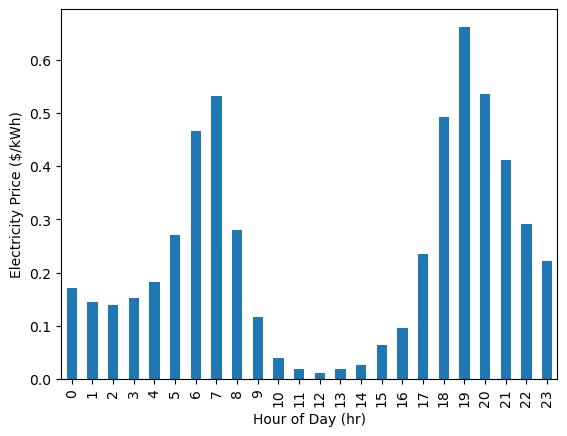

In [196]:
day = 340

start_hour = day * 24
end_hour = start_hour + horizon

control_period = prices.loc[start_hour:end_hour-1]
control_period.index = control_period.index % 24
control_period['TwoPeakHDP'].plot.bar()
plt.xlabel('Hour of Day (hr)')
plt.ylabel('Electricity Price ($/kWh)')

Text(0, 0.5, 'Heating Load (kWh)')

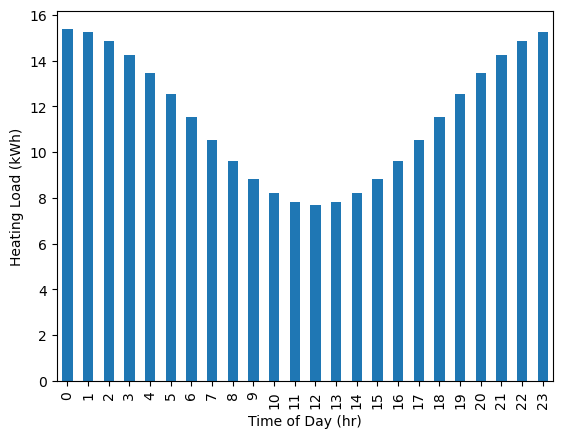

In [197]:
import math

house_size = 1500 # square feet
peak_load = 35 * house_size # 55 BTU, 55 taken from https://iwae.com/resources/articles/size-furnace-need.html#:~:text=Each%20zone%20includes%20the%20recommended,60%20BTUs%20per%20square%20foot.
peak_load = peak_load * 0.000293071 # kWh

load = pd.DataFrame(index = control_period.index)
for ix in load.index:
    load.loc[ix, 'Load (kWh)'] = peak_load * (1 + 0.25 * math.cos(ix * (2 * math.pi)/24) - 0.25)
load['Load (kWh)'].plot.bar()
plt.xlabel('Time of Day (hr)')
plt.ylabel('Heating Load (kWh)')

Text(0, 0.5, 'Outdoor Air Temperature (deg C)')

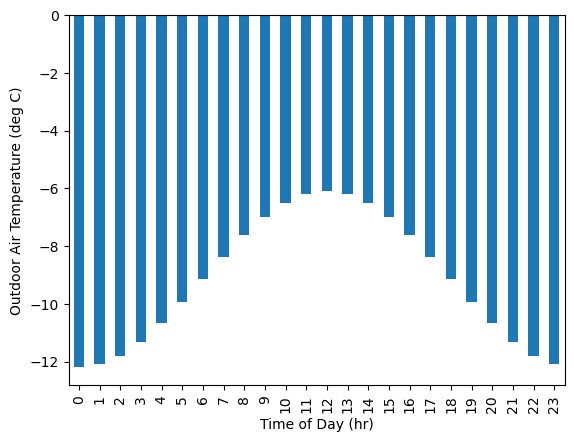

In [198]:
temperature = pd.DataFrame(index = control_period.index)
base_temperature = -12.2

for ix in temperature.index:
    temperature.loc[ix, 'OAT (deg C)'] = base_temperature * (1 + 0.25 * math.cos(ix * (2 * math.pi)/24) - 0.25)
temperature['OAT (deg C)'].plot.bar()
plt.xlabel('Time of Day (hr)')
plt.ylabel('Outdoor Air Temperature (deg C)')

In [199]:
TC = pd.read_csv(os.path.join(os.getcwd(), '..', 'Stor4Build', 'Pareto Algorithm', 'LG_AWHP_TC_4025LPM.csv'), index_col = 0)
display(TC)
COP = pd.read_csv(os.path.join(os.getcwd(), '..', 'Stor4Build', 'Pareto Algorithm', 'LG_AWHP_COP_4025LPM.csv'), index_col = 0)
display(COP)

import numpy as np

TC_est = np.polyfit(TC.index, TC['45'], 3)
COP_est = np.polyfit(COP.index, COP['45'], 2)

,30,35,40,45
-25,9.25,9.0,8.75,8.50
-20,10.53,10.5,10.38,10.25
-15,12.00,12.0,12.00,12.00
-7,14.00,14.0,14.00,14.00
-4,14.00,14.0,14.00,14.00
-2,14.00,14.0,14.00,14.00
2,14.00,14.0,14.00,14.00
7,14.00,14.0,14.00,14.00
10,14.00,14.0,14.00,14.00
15,14.00,14.0,14.00,14.00


,30,35,40,45
-25,2.08,1.80,1.53,1.25
-20,2.26,2.05,1.84,1.63
-15,2.45,2.30,2.15,2.00
-7,3.12,2.95,2.79,2.63
-4,3.30,3.10,2.90,2.70
-2,3.39,3.20,3.01,2.82
2,3.65,3.40,3.21,3.02
7,4.83,4.50,4.17,3.83
10,5.12,4.77,4.42,4.06
15,6.02,5.57,5.13,4.68


Text(0.5, 0, 'OAT (deg C)')

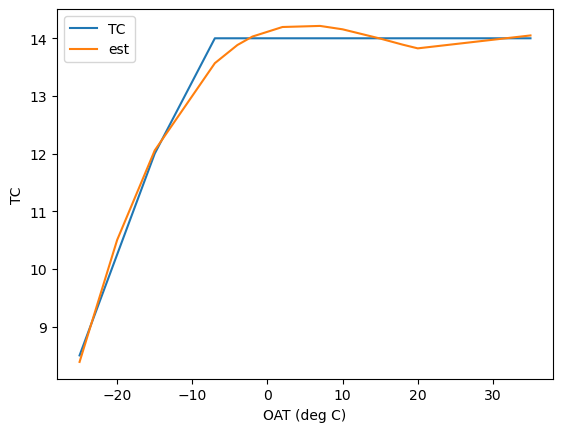

In [200]:
fig = plt.figure()

plt.plot(TC.index, TC['45'], label = 'TC')
plt.plot(TC.index, np.polyval(TC_est, TC.index), label = 'est')
plt.legend()
plt.ylabel('TC')
plt.xlabel('OAT (deg C)')

Text(0.5, 0, 'OAT (deg C)')

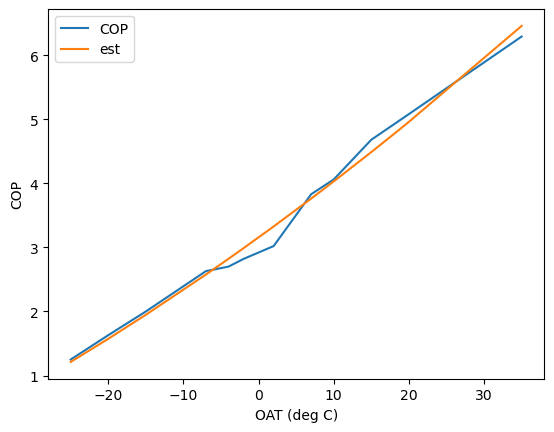

In [201]:
fig = plt.figure()

plt.plot(COP.index, COP['45'], label = 'COP')
plt.plot(COP.index, np.polyval(COP_est, COP.index), label = 'est')
plt.legend()
plt.ylabel('COP')
plt.xlabel('OAT (deg C)')

,Heating (kWh),COP,kWh-elec,$/kWh-therm
0,25.417404,2.164418,11.743295,0.079190
1,25.460465,2.172517,11.719339,0.066283
2,25.584543,2.196296,11.648952,0.063061
3,25.775322,2.234228,11.536569,0.067943
4,26.011996,2.283856,11.389506,0.080084
5,26.270950,2.341927,11.217662,0.115845
6,26.529450,2.404578,11.032893,0.193755
7,26.768482,2.467572,10.848105,0.215921
8,26.974246,2.526583,10.676176,0.110822
9,27.138260,2.577495,10.528928,0.044927


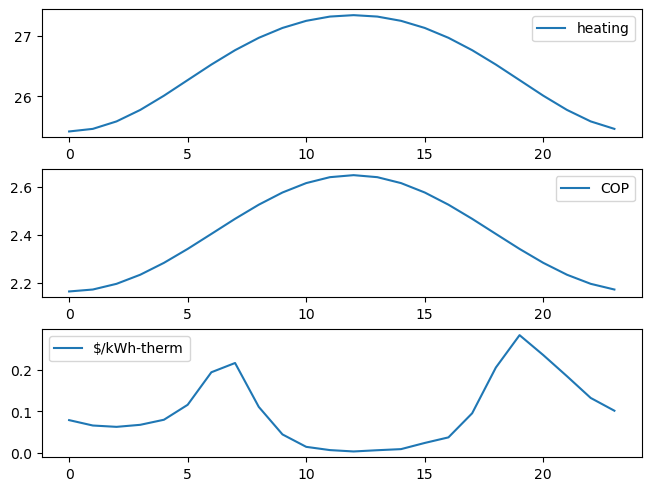

In [202]:
hp_performance = pd.DataFrame(index = control_period.index)
hp_performance['Heating (kWh)'] = 2 * np.polyval(TC_est, temperature['OAT (deg C)']) # Assuming two heat pumps, because 1 wasn't enough to meet load
hp_performance['COP'] = np.polyval(COP_est, temperature['OAT (deg C)'])
hp_performance['kWh-elec'] = hp_performance['Heating (kWh)'] / hp_performance['COP']
hp_performance['$/kWh-therm'] = control_period['TwoPeakHDP'] * hp_performance['kWh-elec']/ hp_performance['Heating (kWh)']
display(hp_performance)

fig, ax = plt.subplots(3, constrained_layout = True)

ax[0].plot(hp_performance['Heating (kWh)'], label = 'heating')
ax[0].legend()
ax[1].plot(hp_performance['COP'], label = 'COP')
ax[1].legend()
ax[2].plot(hp_performance['$/kWh-therm'], label = '$/kWh-therm')
ax[2].legend()

In [203]:
needed_heating = load.loc[0:horizon, 'Load (kWh)'].sum()
print(needed_heating)

276.952095


In [204]:
sorted_index = list(hp_performance.loc[0:horizon].sort_values('$/kWh-therm').index)
display(sorted_index)

heating_provided = 0
operating_hours = []

for ix in sorted_index:
    print(ix)
    operating_hours.append(ix)
    heating_provided += hp_performance.loc[ix, 'Heating (kWh)']
    print(heating_provided)
    if heating_provided >= needed_heating:
        break

[12,
 13,
 11,
 14,
 10,
 15,
 16,
 9,
 2,
 1,
 3,
 0,
 4,
 17,
 23,
 8,
 5,
 22,
 21,
 6,
 18,
 7,
 20,
 19]

12
27.350860701993092
13
54.6781290303939
11
82.00539735879471
14
109.26177771816543
10
136.51815807753616
15
163.65641845307312
16
190.6306642410617
9
217.76892461659867
2
243.35346767435948
1
268.8139326854227
3
294.5892547243403


In [205]:
# Identify operating periods

operating_periods = {}

print(operating_hours)

while len(operating_hours) > 0:
    val = operating_hours[0]
    print(val)
    if len(operating_periods.keys()) > 0:
        for key in operating_periods.keys():
            print(key)
            if val + 1 in operating_periods[key] or val - 1 in operating_periods[key]:
                operating_periods[key].append(val)
                operating_hours.remove(val)
                found = True
                print('Found!')
                break
            else:
                found = False
    else:
        found = False
    if found == False:
        group_name = 'Group {}'.format(len(operating_periods.keys()) + 1)
        print('new group: {}'.format(group_name))
        operating_periods[group_name] = []
        operating_periods[group_name].append(val)
        operating_hours.remove(val)
        
display(operating_periods)          

[12, 13, 11, 14, 10, 15, 16, 9, 2, 1, 3]
12
new group: Group 1
13
Group 1
Found!
11
Group 1
Found!
14
Group 1
Found!
10
Group 1
Found!
15
Group 1
Found!
16
Group 1
Found!
9
Group 1
Found!
2
Group 1
new group: Group 2
1
Group 1
Group 2
Found!
3
Group 1
Group 2
Found!


{'Group 1': [12, 13, 11, 14, 10, 15, 16, 9], 'Group 2': [2, 1, 3]}

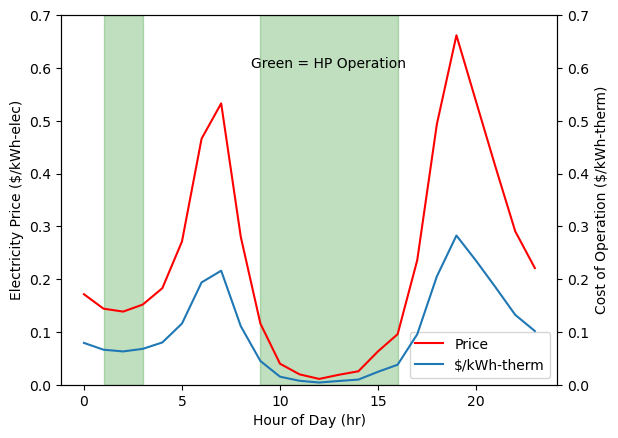

In [206]:
fig, ax1 = plt.subplots()

ln1 = ax1.plot(control_period['TwoPeakHDP'], label = 'Price', color = 'red')
ax2 = ax1.twinx()
ln2 = ax2.plot(hp_performance['$/kWh-therm'], label = '$/kWh-therm')
for group in operating_periods.keys():
    hours = operating_periods[group]
    hours.sort()
    ax1.axvspan(hours[0], hours[-1], color = 'green', alpha = 0.25)

ax1.set_xlabel('Hour of Day (hr)')
ax1.set_ylabel('Electricity Price ($/kWh-elec)')
ax1.set_ylim(0, 0.7)
ax2.set_ylabel('Cost of Operation ($/kWh-therm)')
ax2.set_ylim(0, 0.7)

ax1.text(8.5, 0.6, 'Green = HP Operation')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

In [207]:
# Exploatory calculations with storage, assuming storage state of charge = 100% at start of period

max_storage = 40 # kWh

storage_capacity = pd.DataFrame(index = range(0, horizon), columns = ['Storage (kWh)'])

tot_heating = 0

for period in operating_periods.keys():
    if 0 in operating_periods[period]:
        heating = hp_performance.loc[0, 'Heating (kWh)']
    else:
        heating = 0

tot_heating += heating
storage_capacity.loc[0, 'Storage (kWh)'] = max_storage - load.loc[0, 'Load (kWh)'] + heating
for ix in storage_capacity.index[1:]:
    for period in operating_periods.keys():
        if ix in operating_periods[period]:
            heating = hp_performance.loc[ix, 'Heating (kWh)']
            break
        else:
            heating = 0
    storage_capacity.loc[ix, 'Storage (kWh)'] = storage_capacity.loc[ix-1, 'Storage (kWh)'] - load.loc[ix, 'Load (kWh)'] + heating
    
    tot_heating += heating
display(storage_capacity)

,Storage (kWh)
0,24.613772
1,34.819078
2,45.532735
3,57.04846
4,43.585511
5,31.050278
6,19.510607
7,8.966499
8,-0.649893
9,17.668623


In [208]:
if min(storage_capacity['Storage (kWh)']) < 0:
    temp = storage_capacity[storage_capacity['Storage (kWh)'] < 0]
    horizon = temp.index[0]
    print(horizon)

8


Text(0, 0.5, 'Electricity Price ($/kWh)')

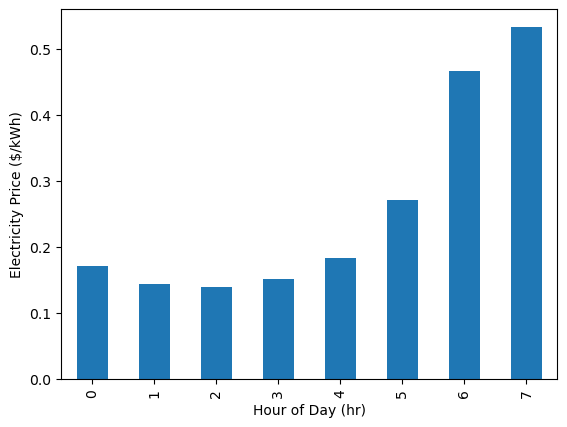

In [209]:
day = 340

start_hour = day * 24
end_hour = start_hour + horizon

control_period = prices.loc[start_hour:end_hour-1]
control_period.index = control_period.index % 24
control_period['TwoPeakHDP'].plot.bar()
plt.xlabel('Hour of Day (hr)')
plt.ylabel('Electricity Price ($/kWh)')

Text(0, 0.5, 'Heating Load (kWh)')

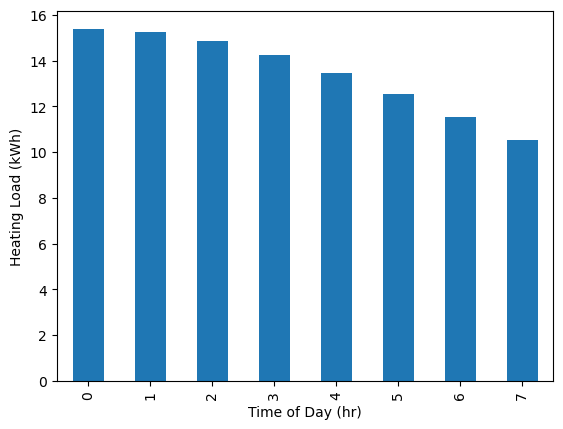

In [210]:
import math

house_size = 1500 # square feet
peak_load = 35 * house_size # 55 BTU, 55 taken from https://iwae.com/resources/articles/size-furnace-need.html#:~:text=Each%20zone%20includes%20the%20recommended,60%20BTUs%20per%20square%20foot.
peak_load = peak_load * 0.000293071 # kWh

load = pd.DataFrame(index = control_period.index)
for ix in load.index:
    load.loc[ix, 'Load (kWh)'] = peak_load * (1 + 0.25 * math.cos(ix * (2 * math.pi)/24) - 0.25)
load['Load (kWh)'].plot.bar()
plt.xlabel('Time of Day (hr)')
plt.ylabel('Heating Load (kWh)')

Text(0, 0.5, 'Outdoor Air Temperature (deg C)')

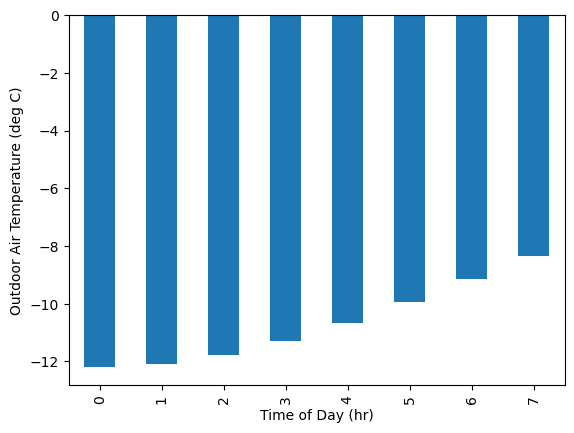

In [211]:
temperature = pd.DataFrame(index = control_period.index)
base_temperature = -12.2

for ix in temperature.index:
    temperature.loc[ix, 'OAT (deg C)'] = base_temperature * (1 + 0.25 * math.cos(ix * (2 * math.pi)/24) - 0.25)
temperature['OAT (deg C)'].plot.bar()
plt.xlabel('Time of Day (hr)')
plt.ylabel('Outdoor Air Temperature (deg C)')

,Heating (kWh),COP,kWh-elec,$/kWh-therm
0,25.417404,2.164418,11.743295,0.079190
1,25.460465,2.172517,11.719339,0.066283
2,25.584543,2.196296,11.648952,0.063061
3,25.775322,2.234228,11.536569,0.067943
4,26.011996,2.283856,11.389506,0.080084
5,26.270950,2.341927,11.217662,0.115845
6,26.529450,2.404578,11.032893,0.193755
7,26.768482,2.467572,10.848105,0.215921


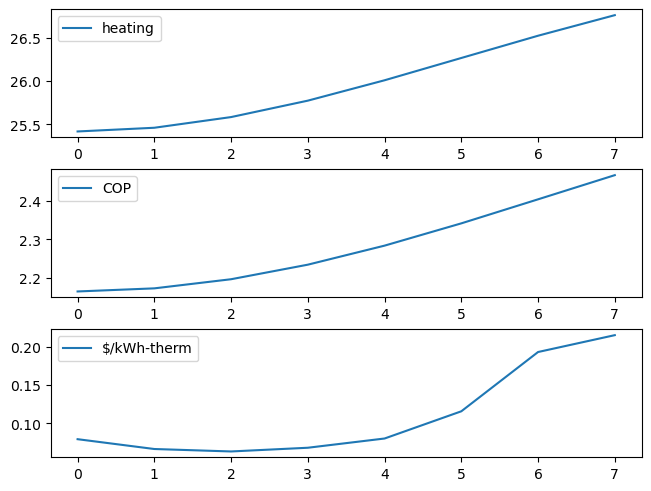

In [212]:
hp_performance = pd.DataFrame(index = control_period.index)
hp_performance['Heating (kWh)'] = 2 * np.polyval(TC_est, temperature['OAT (deg C)']) # Assuming two heat pumps, because 1 wasn't enough to meet load
hp_performance['COP'] = np.polyval(COP_est, temperature['OAT (deg C)'])
hp_performance['kWh-elec'] = hp_performance['Heating (kWh)'] / hp_performance['COP']
hp_performance['$/kWh-therm'] = control_period['TwoPeakHDP'] * hp_performance['kWh-elec']/ hp_performance['Heating (kWh)']
display(hp_performance)

fig, ax = plt.subplots(3, constrained_layout = True)

ax[0].plot(hp_performance['Heating (kWh)'], label = 'heating')
ax[0].legend()
ax[1].plot(hp_performance['COP'], label = 'COP')
ax[1].legend()
ax[2].plot(hp_performance['$/kWh-therm'], label = '$/kWh-therm')
ax[2].legend()

In [213]:
needed_heating = load.loc[0:horizon, 'Load (kWh)'].sum()
print(needed_heating)

107.8538313617362


In [214]:
sorted_index = list(hp_performance.loc[0:horizon].sort_values('$/kWh-therm').index)
display(sorted_index)

heating_provided = 0
operating_hours = []

for ix in sorted_index:
    print(ix)
    operating_hours.append(ix)
    heating_provided += hp_performance.loc[ix, 'Heating (kWh)']
    print(heating_provided)
    if heating_provided >= needed_heating:
        break

[2, 1, 3, 0, 4, 5, 6, 7]

2
25.58454305776082
1
51.045008068824046
3
76.82033010774171
0
102.23773382555709
4
128.24972944934618


In [215]:
# Identify operating periods

operating_periods = {}

print(operating_hours)

while len(operating_hours) > 0:
    val = operating_hours[0]
    print(val)
    if len(operating_periods.keys()) > 0:
        for key in operating_periods.keys():
            print(key)
            if val + 1 in operating_periods[key] or val - 1 in operating_periods[key]:
                operating_periods[key].append(val)
                operating_hours.remove(val)
                found = True
                print('Found!')
                break
            else:
                found = False
    else:
        found = False
    if found == False:
        group_name = 'Group {}'.format(len(operating_periods.keys()) + 1)
        print('new group: {}'.format(group_name))
        operating_periods[group_name] = []
        operating_periods[group_name].append(val)
        operating_hours.remove(val)
        
display(operating_periods)   

[2, 1, 3, 0, 4]
2
new group: Group 1
1
Group 1
Found!
3
Group 1
Found!
0
Group 1
Found!
4
Group 1
Found!


{'Group 1': [2, 1, 3, 0, 4]}

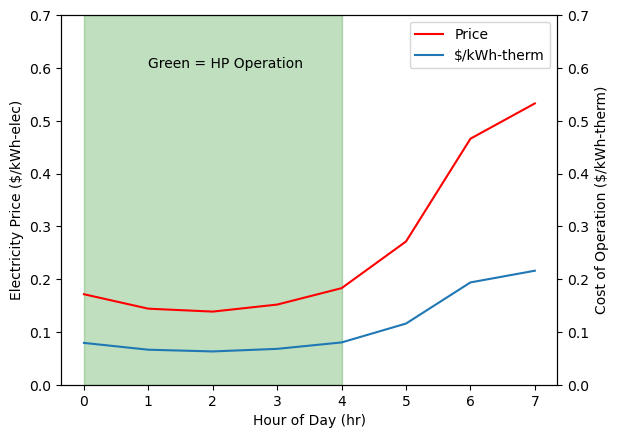

In [216]:
fig, ax1 = plt.subplots()

ln1 = ax1.plot(control_period['TwoPeakHDP'], label = 'Price', color = 'red')
ax2 = ax1.twinx()
ln2 = ax2.plot(hp_performance['$/kWh-therm'], label = '$/kWh-therm')
for group in operating_periods.keys():
    hours = operating_periods[group]
    hours.sort()
    ax1.axvspan(hours[0], hours[-1], color = 'green', alpha = 0.25)

ax1.set_xlabel('Hour of Day (hr)')
ax1.set_ylabel('Electricity Price ($/kWh-elec)')
ax1.set_ylim(0, 0.7)
ax2.set_ylabel('Cost of Operation ($/kWh-therm)')
ax2.set_ylim(0, 0.7)

ax1.text(1, 0.6, 'Green = HP Operation')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)